<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B3%5D_ER_cHB_RF_KFold_Var_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude ER Data ML 111020.csv')
Oil_ER = data['Bio-crude Oil ER']
Features = data.drop('Bio-crude Oil ER', axis = 1)

# Success
print ("Bio-crude ER dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude ER dataset has 130 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,52.4
30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,82.7
60,10.0,34.0,0.0,0.0,29.3,0.0,6.8,65.5
90,3.5,16.9,17.4,8.9,0.0,35.4,4.5,60.5
120,13.9,46.9,0.0,0.0,28.0,0.0,3.5,60.2


In [2]:
# TODO: Minimum price of the data
minimum_Oil_ER = np.min(Oil_ER)

# TODO: Maximum price of the data
maximum_Oil_ER = np.max(Oil_ER)

# TODO: Mean price of the data
mean_Oil_ER = np.mean(Oil_ER)

# TODO: Median price of the data
median_Oil_ER = np.median(Oil_ER)

# TODO: Standard deviation of prices of the data
std_Oil_ER = np.std(Oil_ER)

# Show the calculated statistics

print("Statistics for bio-crude ER dataset:\n")
print("Minimum bio-crude oil ER:{: .2f} %".format(minimum_Oil_ER))
print("Maximum bio-crude oil ER:{: .2f} %".format(maximum_Oil_ER))
print("Mean bio-crude oil ER:{: .2f} %".format(mean_Oil_ER))
print("Median bio-crude oil ER:{: .2f} %".format(median_Oil_ER))
print("Standard deviation of bio-crude oil ER:{: .2f} %".format(std_Oil_ER))

data.describe()

Statistics for bio-crude ER dataset:

Minimum bio-crude oil ER: 2.50 %
Maximum bio-crude oil ER: 92.00 %
Mean bio-crude oil ER: 43.97 %
Median bio-crude oil ER: 45.20 %
Standard deviation of bio-crude oil ER: 19.91 %


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.077692,25.000000,18.858462,8.073846,19.490000,8.094615,6.849231,43.970769
std,19.042308,26.912396,27.227704,16.668829,26.616579,14.239008,11.152323,19.988467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000
50%,1.700000,18.350000,0.000000,0.000000,9.900000,0.000000,2.450000,45.200000
75%,12.175000,44.550000,37.325000,7.975000,27.600000,13.975000,7.150000,58.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,92.000000


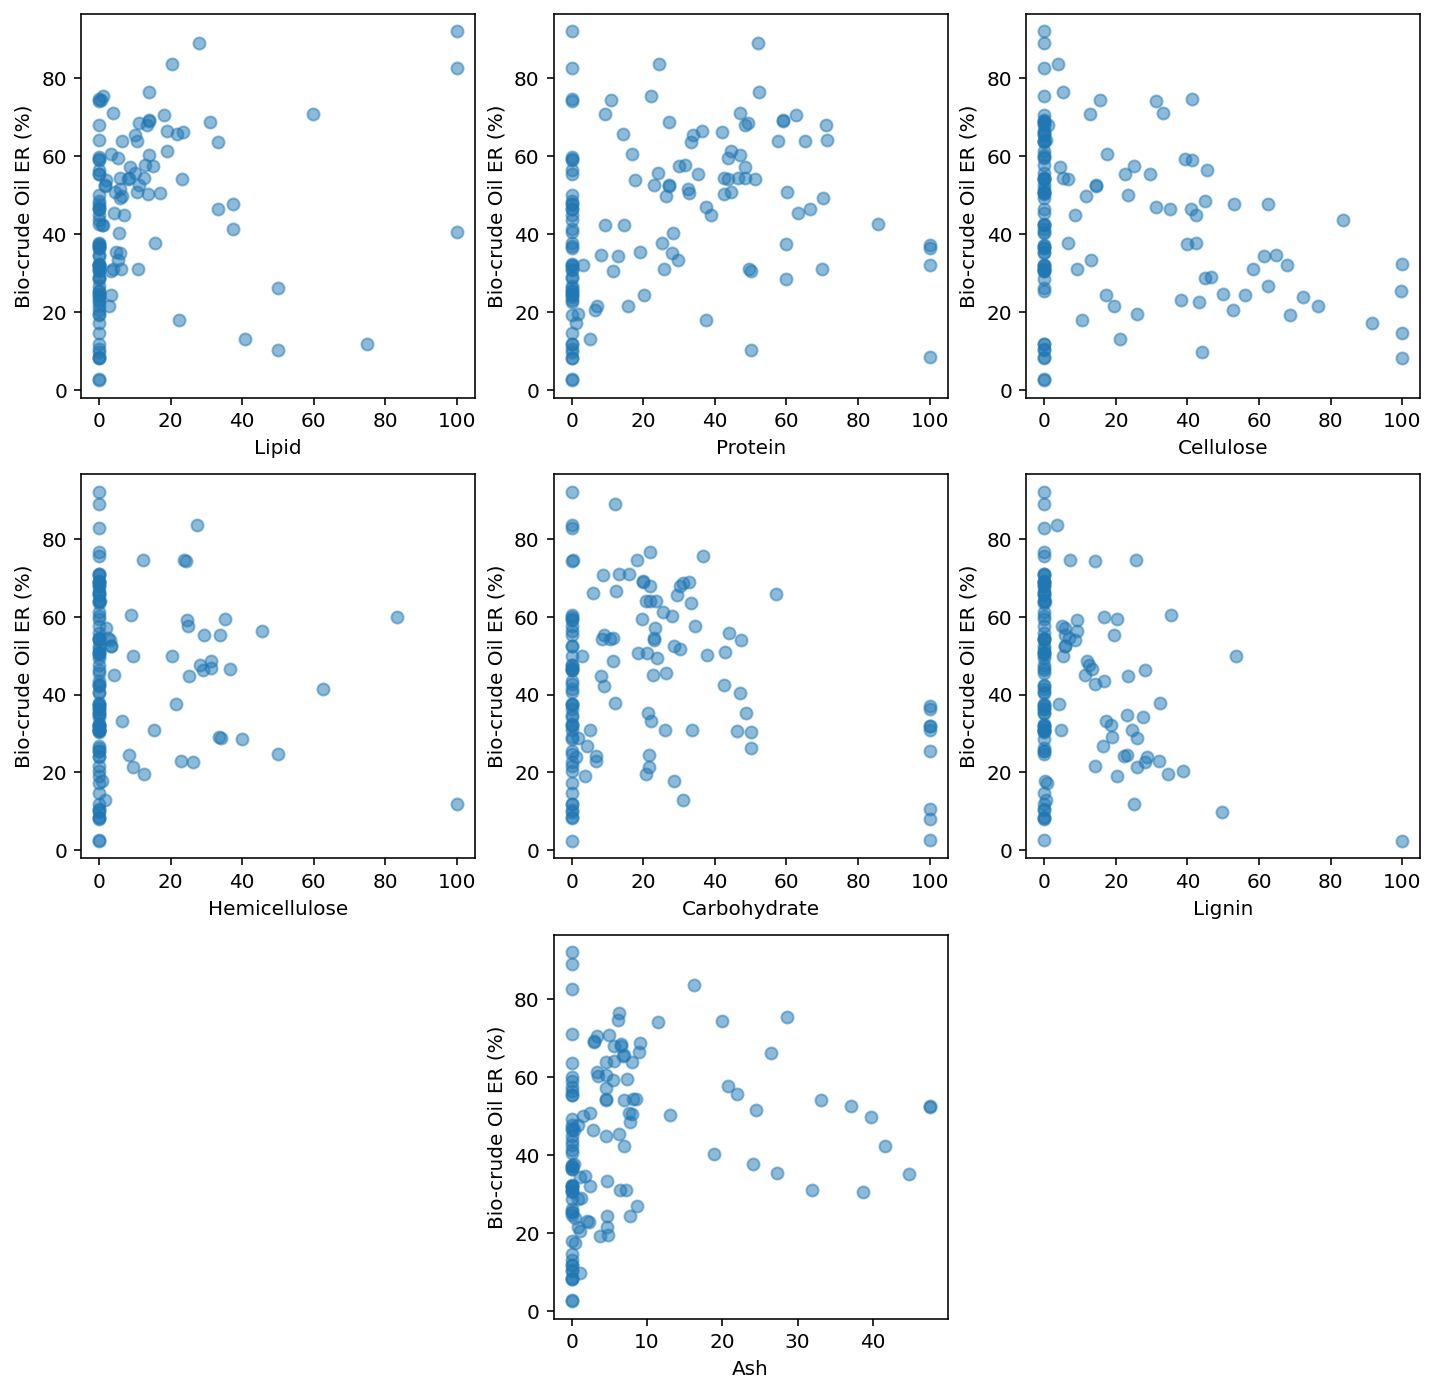

In [3]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Protein'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Ash'],data['Bio-crude Oil ER'],alpha = 0.5)
plt.show()

(array([2., 0., 0., 3., 3., 3., 1., 0., 2., 2., 3., 3., 5., 2., 3., 7., 5.,
        3., 4., 5., 0., 3., 4., 3., 4., 3., 6., 5., 6., 3., 4., 3., 4., 0.,
        4., 4., 3., 3., 3., 0., 4., 1., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([ 2.5 ,  4.29,  6.08,  7.87,  9.66, 11.45, 13.24, 15.03, 16.82,
        18.61, 20.4 , 22.19, 23.98, 25.77, 27.56, 29.35, 31.14, 32.93,
        34.72, 36.51, 38.3 , 40.09, 41.88, 43.67, 45.46, 47.25, 49.04,
        50.83, 52.62, 54.41, 56.2 , 57.99, 59.78, 61.57, 63.36, 65.15,
        66.94, 68.73, 70.52, 72.31, 74.1 , 75.89, 77.68, 79.47, 81.26,
        83.05, 84.84, 86.63, 88.42, 90.21, 92.  ]),
 <a list of 50 Patch objects>)

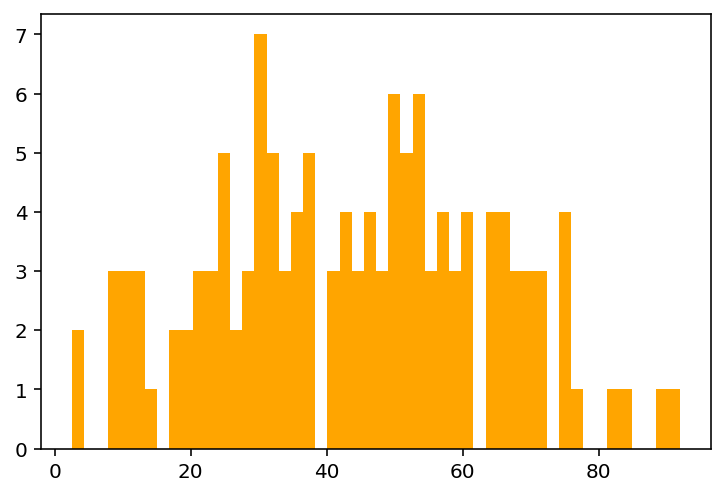

In [4]:
plt.hist(data['Bio-crude Oil ER'],bins=50,color='orange')

(array([66.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

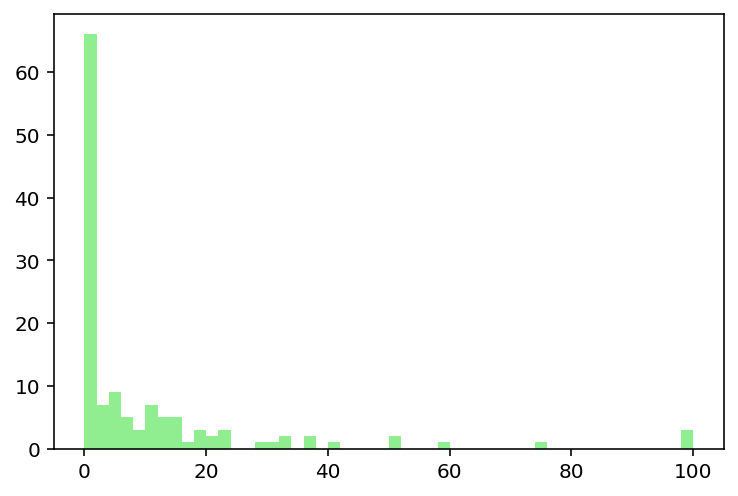

In [5]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


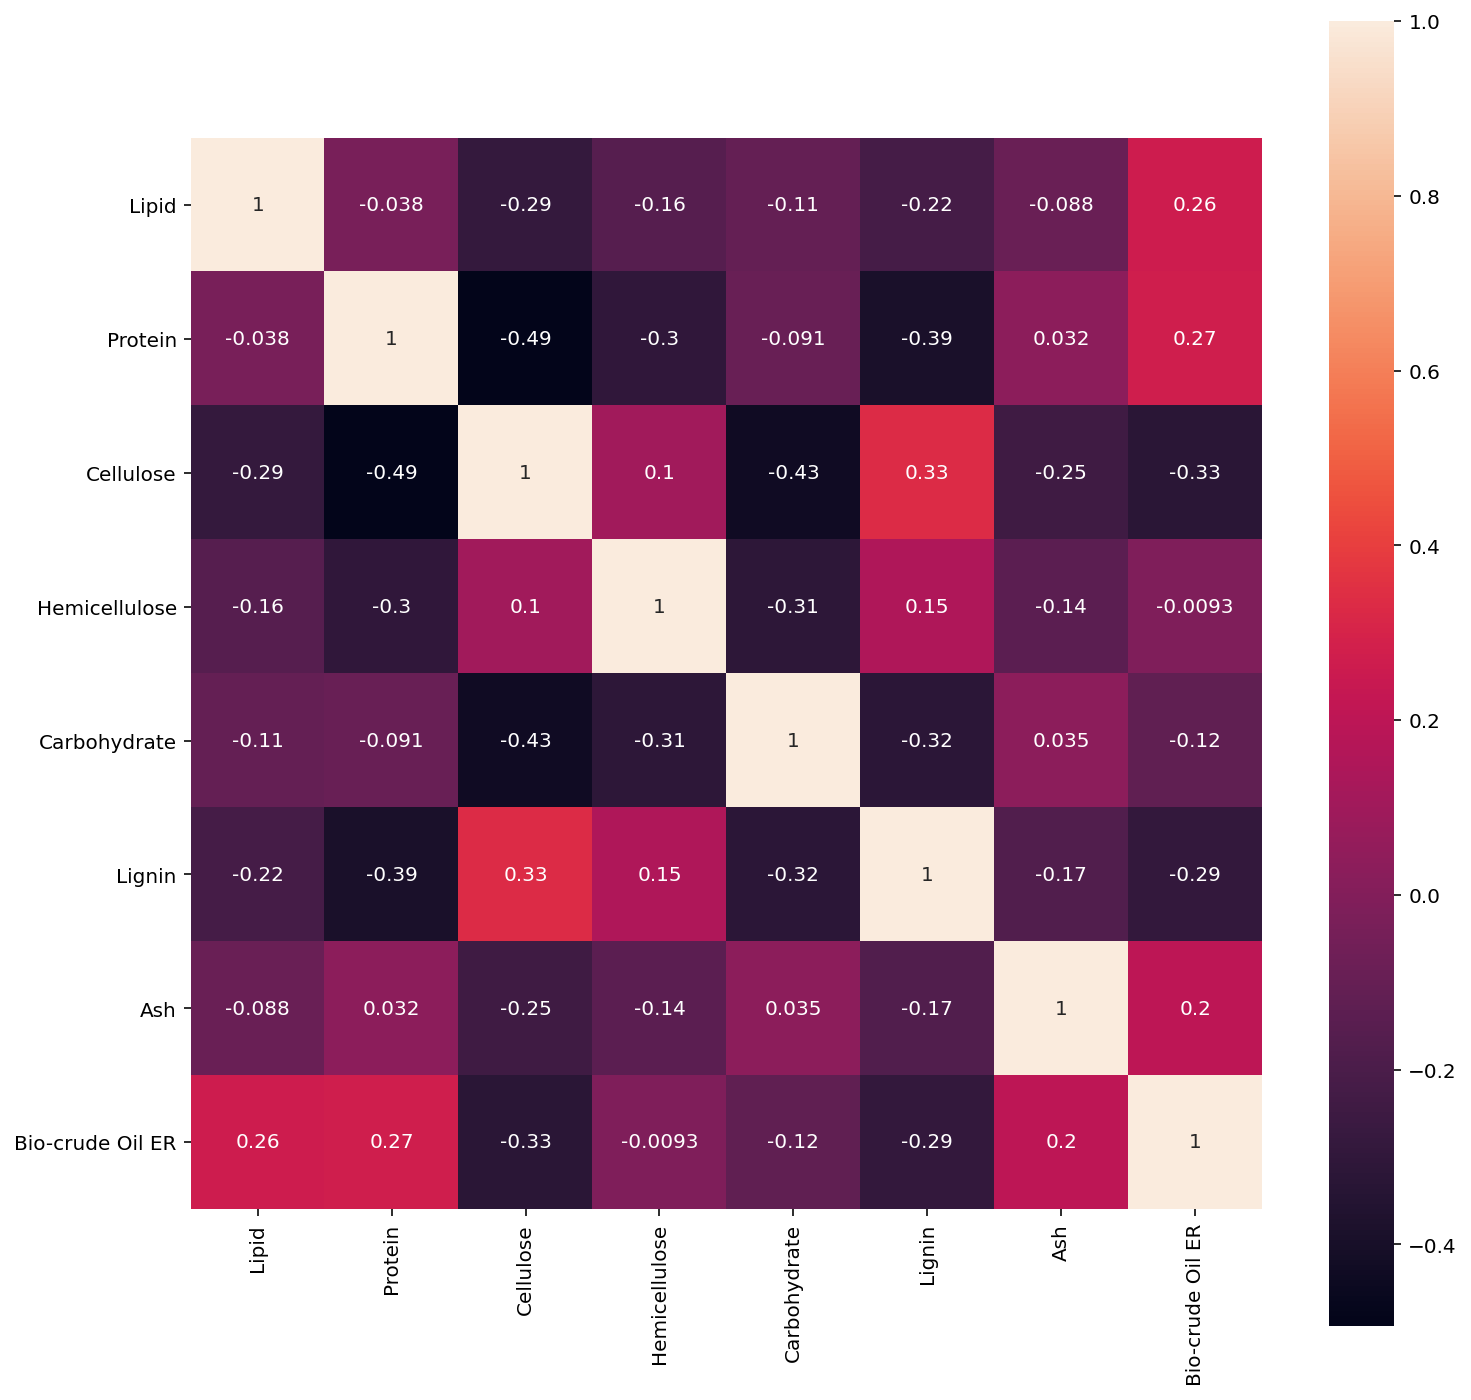

In [6]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [7]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use now.
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.333)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
# feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
#                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
#                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
# for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
#  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 1.69552662167883
Optimal model has RMSE of test set: 4.584153720605472
Optimal model has R2 score of training set 0.88 on test data.
Optimal model has R2 score of test set 0.32 on test data.


In [8]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 5.987356917866116
Standard deviation of MAE of training set 0.3141045676123756
Mean value of MAE of test set 12.982583072779361
Standard deviation of MAE of test set 1.3463311625182939

Mean value of RMSE of training set 8.024848756754867
Standard deviation of RMSE of training set 0.4008675139070921
Mean value of RMSE of test set 16.14709083830848
Standard deviation of RMSE of test set 1.5751839944615693

Mean value of R2 of training set 0.8371898297243727
Standard deviation of R2 of training set 0.009270617232412862
Mean value of R2 of test set 0.32359716412867945
Standard deviation of R2 of test set 0.07699125289192646

Mean value of MRE of training set 0.1361042607765885
Standard deviation of MRE of training set 0.005220062883987578
Mean value of MRE of test set 0.29462209237084086
Standard deviation of MRE of test set 0.01769827845116898


Text(0.5, 1.0, 'y_pred vs. y_true')

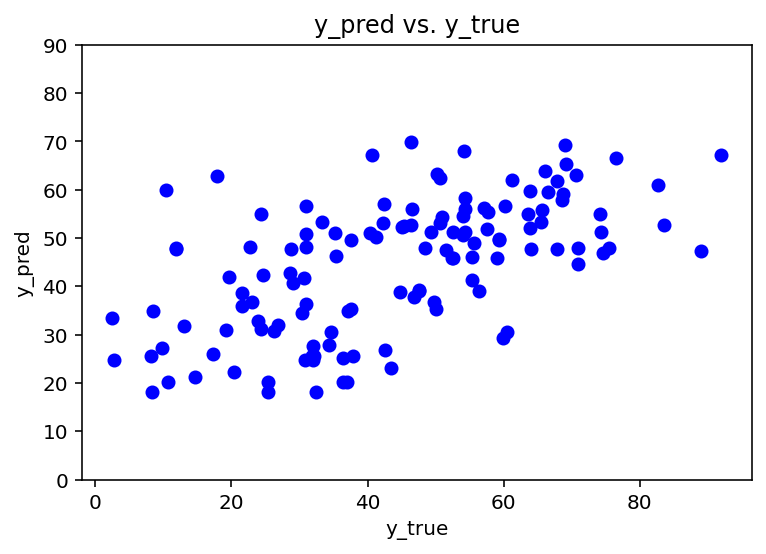

In [10]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_RFR.csv', index = False, header=True)

In [ ]:
# No use now.
def fit_model_tuning1(Features, Oil_HHV):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(min_samples_split=2, min_samples_leaf=1, max_depth=3, max_features='auto')
  
  param_test1 = {'n_estimators':range(10,141,10)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test1, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)

  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning1(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'n_estimators': 70} for the optimal model.
Optimal model has RMSE of training set: 4.486508447125672
Optimal model has RMSE of test set: 6.700484522779181
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [11]:
# n_estimators 参数的最佳取值(10, 201, 10)

for i in range(1, 201, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    params = {'n_estimators':i,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.41213527343987816
Standard deviation of R2 of training set 0.07452180799298377
Mean value of R2 of test set -0.2229271661320018
Standard deviation of R2 of test set 0.5024692309068736
2
Mean value of R2 of training set 0.7028152693588234
Standard deviation of R2 of training set 0.05178983114452363
Mean value of R2 of test set 0.04926113908012256
Standard deviation of R2 of test set 0.1769646559808276
3
Mean value of R2 of training set 0.7129531519025384
Standard deviation of R2 of training set 0.04252459343643595
Mean value of R2 of test set 0.2024039121840615
Standard deviation of R2 of test set 0.12245411567868932
4
Mean value of R2 of training set 0.7452388606110809
Standard deviation of R2 of training set 0.040219912264374345
Mean value of R2 of test set 0.17591907430803017
Standard deviation of R2 of test set 0.25818525826263566
5
Mean value of R2 of training set 0.7661230394005828
Standard deviation of R2 of training set 0.03841578777199159
Me

In [ ]:
# No use now.
def fit_model_tuning2(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, min_samples_leaf=1, max_features='auto')
  
  param_test2 = {'max_depth':range(1,16,2),'min_samples_split':range(2,43,20)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test2, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning2(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

In [12]:
# max_depth 参数的最佳取值(1, 16, 2)

for i in range(1, 21, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    params = {'n_estimators':29,'max_depth':i,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.29833694528706967
Standard deviation of R2 of training set 0.03246889595639478
Mean value of R2 of test set 0.23459210687096566
Standard deviation of R2 of test set 0.0840381045036876
2
Mean value of R2 of training set 0.4749718617150699
Standard deviation of R2 of training set 0.03331057475295058
Mean value of R2 of test set 0.33389164497226753
Standard deviation of R2 of test set 0.09092270232378659
3
Mean value of R2 of training set 0.6030314097819134
Standard deviation of R2 of training set 0.025096783071281298
Mean value of R2 of test set 0.3745926670433292
Standard deviation of R2 of test set 0.06325036312641556
4
Mean value of R2 of training set 0.6941764138715308
Standard deviation of R2 of training set 0.025623735302596883
Mean value of R2 of test set 0.38102938521705026
Standard deviation of R2 of test set 0.07009634071486244
5
Mean value of R2 of training set 0.760124615742216
Standard deviation of R2 of training set 0.01849557386829854
M

In [ ]:
# No use now.
def fit_model_tuning3(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, max_depth=13, max_features='auto')
  
  param_test3 = {'min_samples_split':range(2,43,20),'min_samples_leaf':range(1,42,20)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test3, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning3(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

In [13]:
# min_samples_leaf 参数的最佳取值(1, 42, 20)

for i in range(1, 42, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    params = {'n_estimators':29,'max_depth':5,'min_samples_leaf':i,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.760124615742216
Standard deviation of R2 of training set 0.01849557386829854
Mean value of R2 of test set 0.39053587444185234
Standard deviation of R2 of test set 0.05850953640285901
2
Mean value of R2 of training set 0.7174639398244953
Standard deviation of R2 of training set 0.022485885089564867
Mean value of R2 of test set 0.3684218009463561
Standard deviation of R2 of test set 0.06307259601546587
3
Mean value of R2 of training set 0.6549904141566365
Standard deviation of R2 of training set 0.02702854776518905
Mean value of R2 of test set 0.3478619663135931
Standard deviation of R2 of test set 0.04836928834623502
4
Mean value of R2 of training set 0.6048585708796419
Standard deviation of R2 of training set 0.02447561717412455
Mean value of R2 of test set 0.3345753809981104
Standard deviation of R2 of test set 0.05074741512450555
5
Mean value of R2 of training set 0.5650663988080878
Standard deviation of R2 of training set 0.031580068433862435
Mea

In [14]:
# min_samples_split 参数的最佳取值(2, 43, 20)

for i in range(2, 44, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    params = {'n_estimators':29,'max_depth':5,'min_samples_leaf':1,'min_samples_split':i,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

2
Mean value of R2 of training set 0.760124615742216
Standard deviation of R2 of training set 0.01849557386829854
Mean value of R2 of test set 0.39053587444185234
Standard deviation of R2 of test set 0.05850953640285901
3
Mean value of R2 of training set 0.7532422718159999
Standard deviation of R2 of training set 0.01914498880105221
Mean value of R2 of test set 0.3738566914422301
Standard deviation of R2 of test set 0.07370815458804686
4
Mean value of R2 of training set 0.7423635061621359
Standard deviation of R2 of training set 0.017504822836087185
Mean value of R2 of test set 0.3668478116585746
Standard deviation of R2 of test set 0.08431561192823837
5
Mean value of R2 of training set 0.7362844307374505
Standard deviation of R2 of training set 0.018665374115473542
Mean value of R2 of test set 0.37099938425034695
Standard deviation of R2 of test set 0.06167133119516257
6
Mean value of R2 of training set 0.7253023930781817
Standard deviation of R2 of training set 0.019945128693394137
M

In [ ]:
# No use now.
def fit_model_tuning4(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, max_depth=13, min_samples_split=2, min_samples_leaf=1)
  
  param_test4 = {'max_features':range(1,7,1)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test4, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning4(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

In [15]:
# max_features 参数的最佳取值(1, 7, 1)

for i in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 150)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 4 folds.  
  kf =KFold(n_splits=4, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    params = {'n_estimators':29,'max_depth':5,'min_samples_leaf':1,'min_samples_split':2,'max_features':i}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.6445247702877468
Standard deviation of R2 of training set 0.019950709295097423
Mean value of R2 of test set 0.33629179921202046
Standard deviation of R2 of test set 0.0856711113899988
2
Mean value of R2 of training set 0.7034984864813782
Standard deviation of R2 of training set 0.016969887963877186
Mean value of R2 of test set 0.35734538757401124
Standard deviation of R2 of test set 0.03320678731844598
3
Mean value of R2 of training set 0.7201892051299682
Standard deviation of R2 of training set 0.02201424541536184
Mean value of R2 of test set 0.37811609967413384
Standard deviation of R2 of test set 0.056087160629417425
4
Mean value of R2 of training set 0.7420431414502241
Standard deviation of R2 of training set 0.009670867227508822
Mean value of R2 of test set 0.36267546488935964
Standard deviation of R2 of test set 0.05456252557435743
5
Mean value of R2 of training set 0.7467496839137556
Standard deviation of R2 of training set 0.0186902837438802

In [ ]:
# No use now.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)
  
params = {'n_estimators':70,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 4.491368386486819
Optimal model has RMSE of test set: 6.506274335757428
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 35.05 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 36.66 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 30.29 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $34.18
Trial 2: $42.07
Trial 3: $41.24
Trial 4: $37.34
Trial 5: $39.89
Trial 6: $39.18
Trial 7: $39.65
Trial 8: $40.27
Trial 9: $36.92
Trial 10: $33.05

Range in prices: $9.02
Trial 1: $38.45
Trial 2: $42.22
Trial 3: $37.44
Trial 4: $35.13
Trial 5: $37.11
Trial 6: $35.04
Trial 7: $39.23
Trial 8: $38.50
Trial 9: $35.92
Trial 10: $39.39

Range in prices: $7.18
Trial 1: $31.94
Trial 2: $34.31
Trial 3: $32.91
Trial 4: $32.48
Trial 5: $32.98
Trial 6: $31.15
Trial 7: $31.01
Trial 8: $30.16
Trial 9: $33.69
Trial 10: $35.05

Range in prices: $4.88


In [16]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    params = {'n_estimators':29,'max_depth':5,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 7.818322135568379
Standard deviation of MAE of training set 0.6277415424405852
Mean value of MAE of test set 12.544641609971737
Standard deviation of MAE of test set 1.527253284881739

Mean value of RMSE of training set 9.74013354829875
Standard deviation of RMSE of training set 0.5990922999104143
Mean value of RMSE of test set 15.350684069868638
Standard deviation of RMSE of test set 1.567761385450879

Mean value of R2 of training set 0.760124615742216
Standard deviation of R2 of training set 0.01849557386829854
Mean value of R2 of test set 0.39053587444185234
Standard deviation of R2 of test set 0.05850953640285901

Mean value of MRE of training set 0.17765037920660398
Standard deviation of MRE of training set 0.011598183209097175
Mean value of MRE of test set 0.2844459361132502
Standard deviation of MRE of test set 0.022514852302014866


Text(0.5, 1.0, 'y_pred vs. y_true')

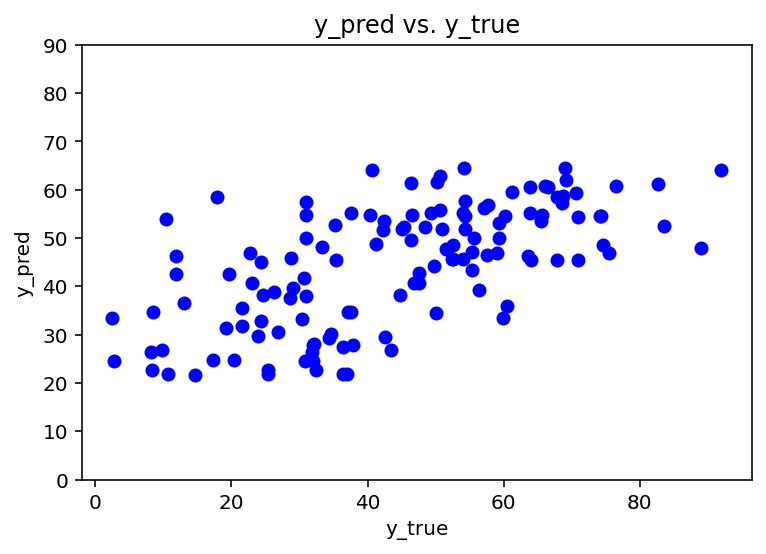

In [18]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [19]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_RFR_opt.csv', index = False, header=True)

 1) Lipid                          0.365679
 2) Ash                            0.167337
 3) Hemicellulose                  0.161043
 4) Lignin                         0.105632
 5) Protein                        0.085123
 6) Carbohydrate                   0.073780
 7) Cellulose                      0.041406


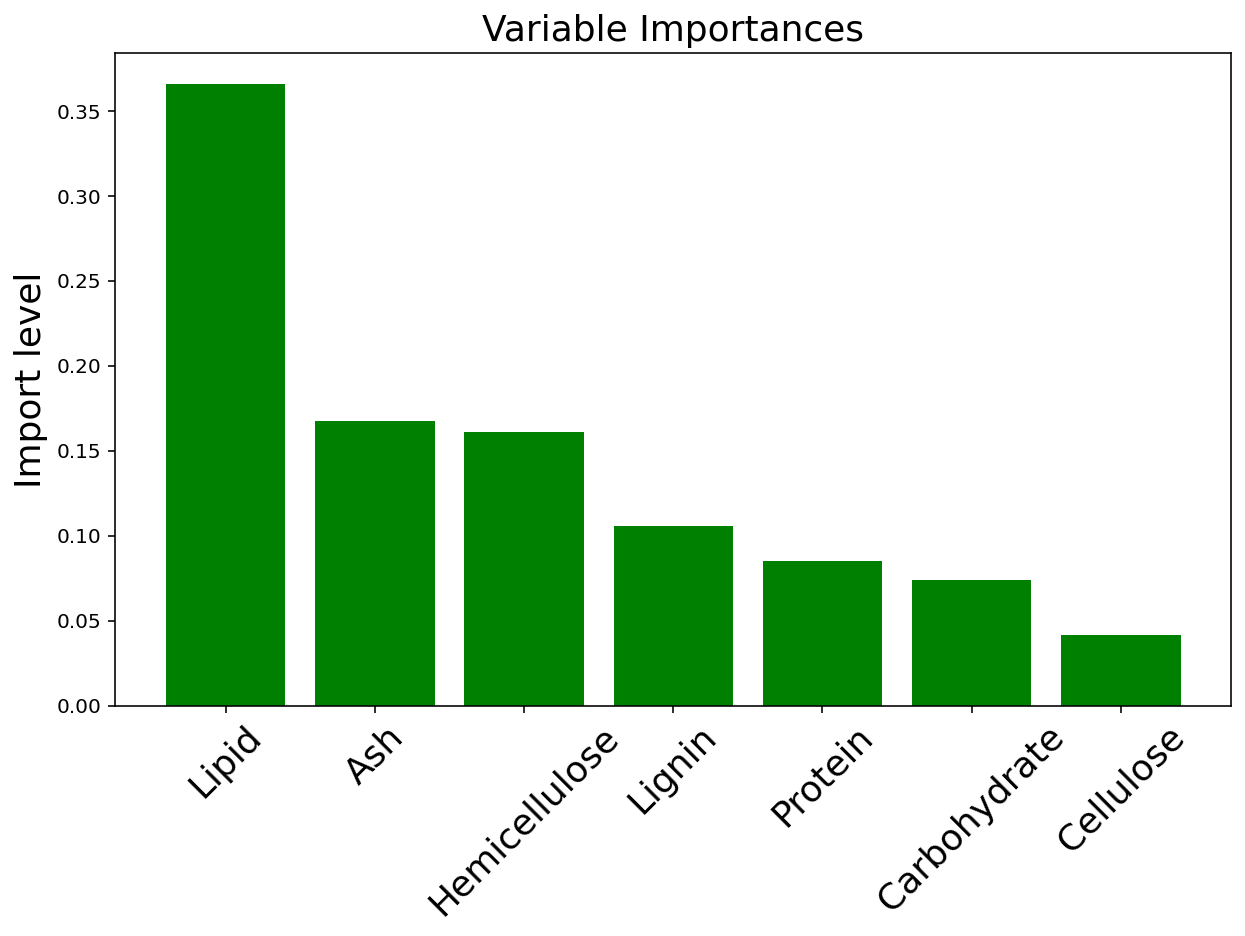

In [21]:
import matplotlib.pyplot as plt

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('RF ER Variable Importances.png')